In [1]:
import dask.dataframe as dd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import ast

parquet_file_path = 'SimulationResults/UltimateAnalysis/RBeta/RBeta.parquet'
pickle_file_path = 'SimulationResults/UltimateAnalysis/RBeta/RBeta.pickle'
with open(pickle_file_path, 'rb') as f:
    pickle_data = pickle.load(f)
print("parameter_names_used", pickle_data['parameter_names_used'])
print("param_values_list_combination", pickle_data['param_values_list_combination'])
print('partition_data', pickle_data['agent_type_count'])
print("agent_type", pickle_data['agent_type'])
print("agent_names", pickle_data['agent_names'])

ddf = dd.read_parquet(parquet_file_path, engine='pyarrow', 
                      include_partition_columns=True, 
                      gather_statistics=True, 
                      dtype_backend='pyarrow')

parameter_names_used ['r_matrix', 'B_matrix', 'washout']
param_values_list_combination [[0.001, 0.0408, 0.0806, 0.12040000000000001, 0.1602, 0.2, inf], [1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100.0, inf], [0.0, 0.02, 0.05]]
partition_data [3, 2, 8, 3]
agent_type ['Resources', 'Resources', 'Resources', 'Uninfected Bacteria', 'Uninfected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Infected Bacteria', 'Phages', 'Phages', 'Phages']
agent_names ['R0', 'R1', 'R2', 'B0', 'B1', 'Infected B0', 'Infected B1', 'Infected B2', 'Infected B3', 'P0', 'P1', 'P2']


In [12]:
def create_r_beta(fixed_washout):
    fig, ax = plt.subplots(7, 7, figsize=(25, 25))
    # plt.title(r"Exponential Growth vs Logistic Growth, $P_0=1$, $r=0.5$, $K=200$", fontsize=18)
    fig.suptitle(rf"Simulation Results, Varying $r$ and $\beta, \omega^o = {fixed_washout}$, All Phage Initial Values = 10", fontsize=30)

    def bacteria_sum(bacteria):
        return np.sum(bacteria, axis=0)
    print(pickle_data['param_values_list_combination'])
    for i, r_value in enumerate(pickle_data['param_values_list_combination'][0]):
        for j, beta_value in enumerate(pickle_data['param_values_list_combination'][1]):
            simulation_results = ddf.query(f'r_matrix == {r_value} and B_matrix == {beta_value} and washout == {fixed_washout}').compute()
            t_values = np.array(ast.literal_eval(simulation_results['t_values'].iloc[0]))
            y_values = np.array(ast.literal_eval(simulation_results['y_values'].iloc[0]))
            ax[i, j].plot(t_values, y_values[0], label=f'R0', color="red")
            ax[i, j].plot(t_values, y_values[1], label=f'R1', color="orange")
            ax[i, j].plot(t_values, y_values[2], label=f'R2', color="darkred")
            
            bac_sum = bacteria_sum(y_values[3:13])
            ax[i, j].plot(t_values, bac_sum, label=f'B Sum', color="black")
            
            ax[i, j].plot(t_values, y_values[-3], label=f'P0', color="blue")
            ax[i, j].plot(t_values, y_values[-2], label=f'P1', color="green")
            ax[i, j].plot(t_values, y_values[-1], label=f'P2', color="purple")
            if r_value == np.inf and beta_value == np.inf:
                ax[i, j].set_title(r"$ri$=Original, $\beta$=Original", fontsize=20)
            elif beta_value == np.inf:
                ax[i, j].set_title(rf"$ri$={r_value:.3f}, $\beta$=Original", fontsize=20)
            elif r_value == np.inf:
                ax[i, j].set_title(rf"$ri$=Original, $\beta$={beta_value:.1f}", fontsize=20)
            else:
                ax[i, j].set_title(rf"$ri$={r_value:.3f}, $\beta$={beta_value:.1f}", fontsize=20)
            if (j == 0):
                ax[i, j].set_ylabel('y_values', fontsize=25)
            if (i == 6):
                ax[i, j].set_xlabel('Time', fontsize=25)
            if (i == 0 and j == 6):
                ax[i, j].legend(fontsize=19, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            ax[i, j].tick_params(axis='both', which='major', labelsize=14)
            ax[i, j].grid()
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'LatexReport/Images/Plots/Created/UA/r_beta_washout_{fixed_washout}.png')

[[0.001, 0.0408, 0.0806, 0.12040000000000001, 0.1602, 0.2, inf], [1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100.0, inf], [0.0, 0.02, 0.05]]


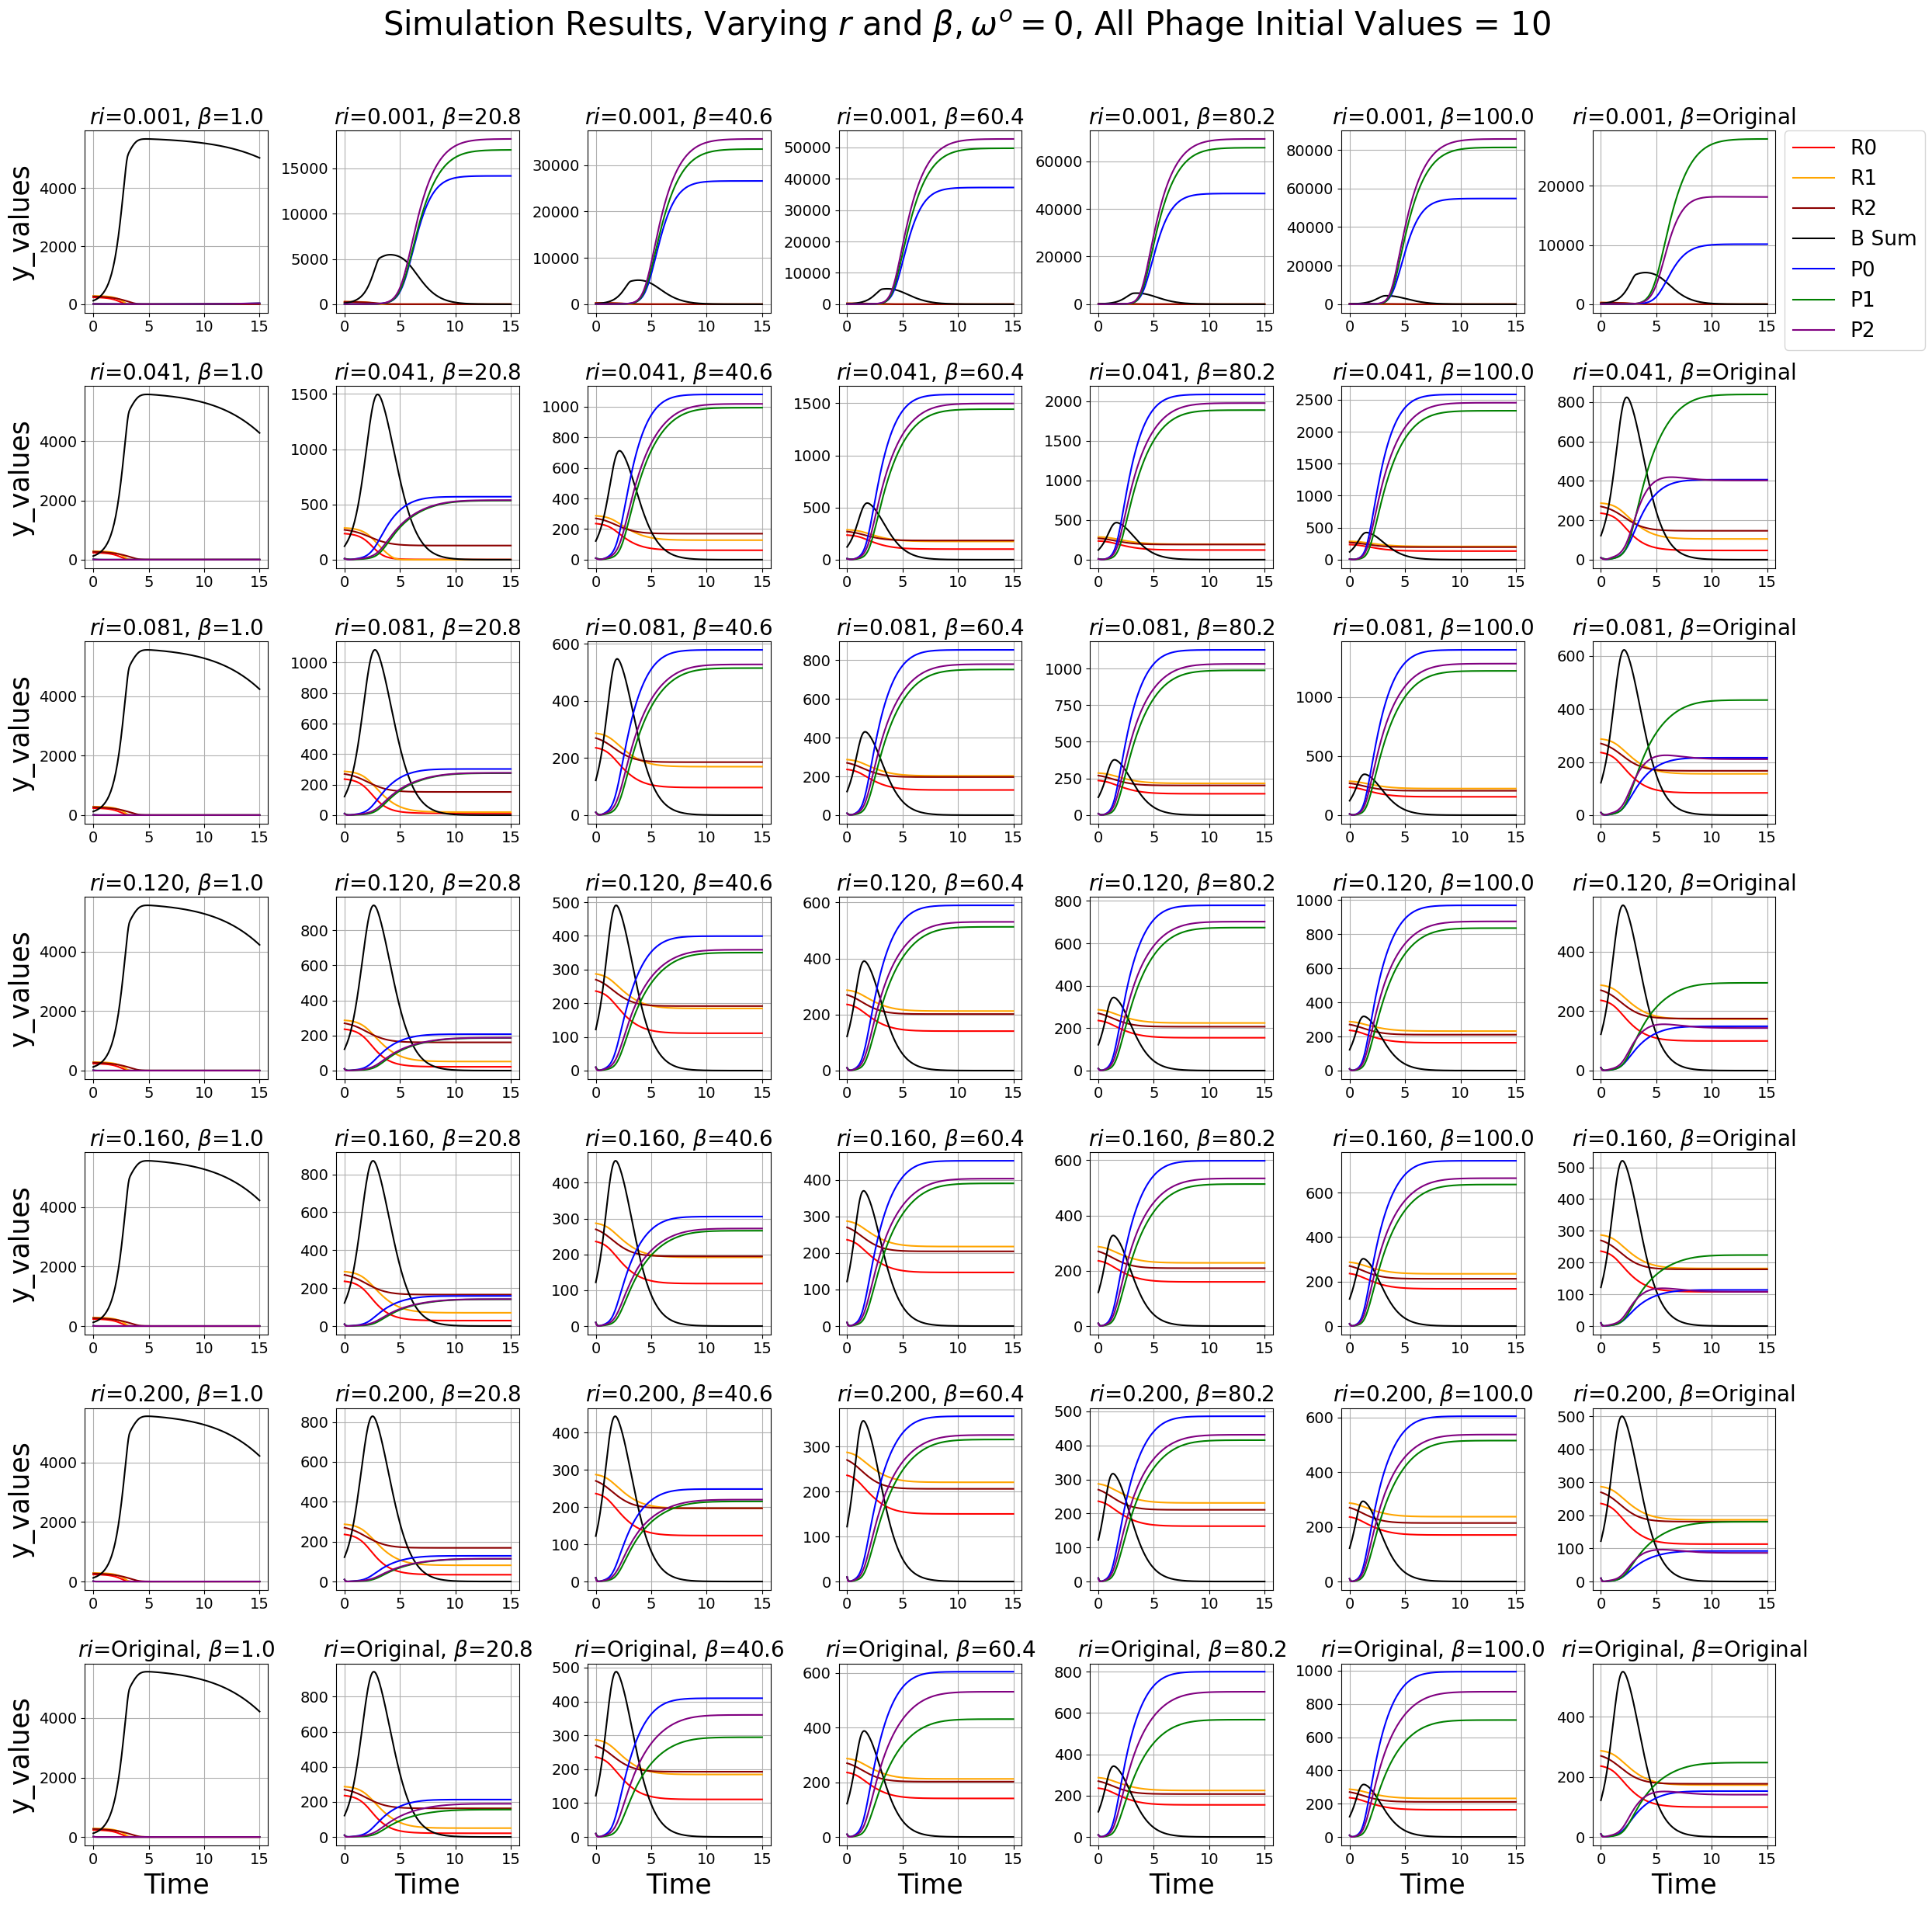

In [13]:
fixed_washout = 0
create_r_beta(fixed_washout)

[[0.001, 0.0408, 0.0806, 0.12040000000000001, 0.1602, 0.2, inf], [1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100.0, inf], [0.0, 0.02, 0.05]]


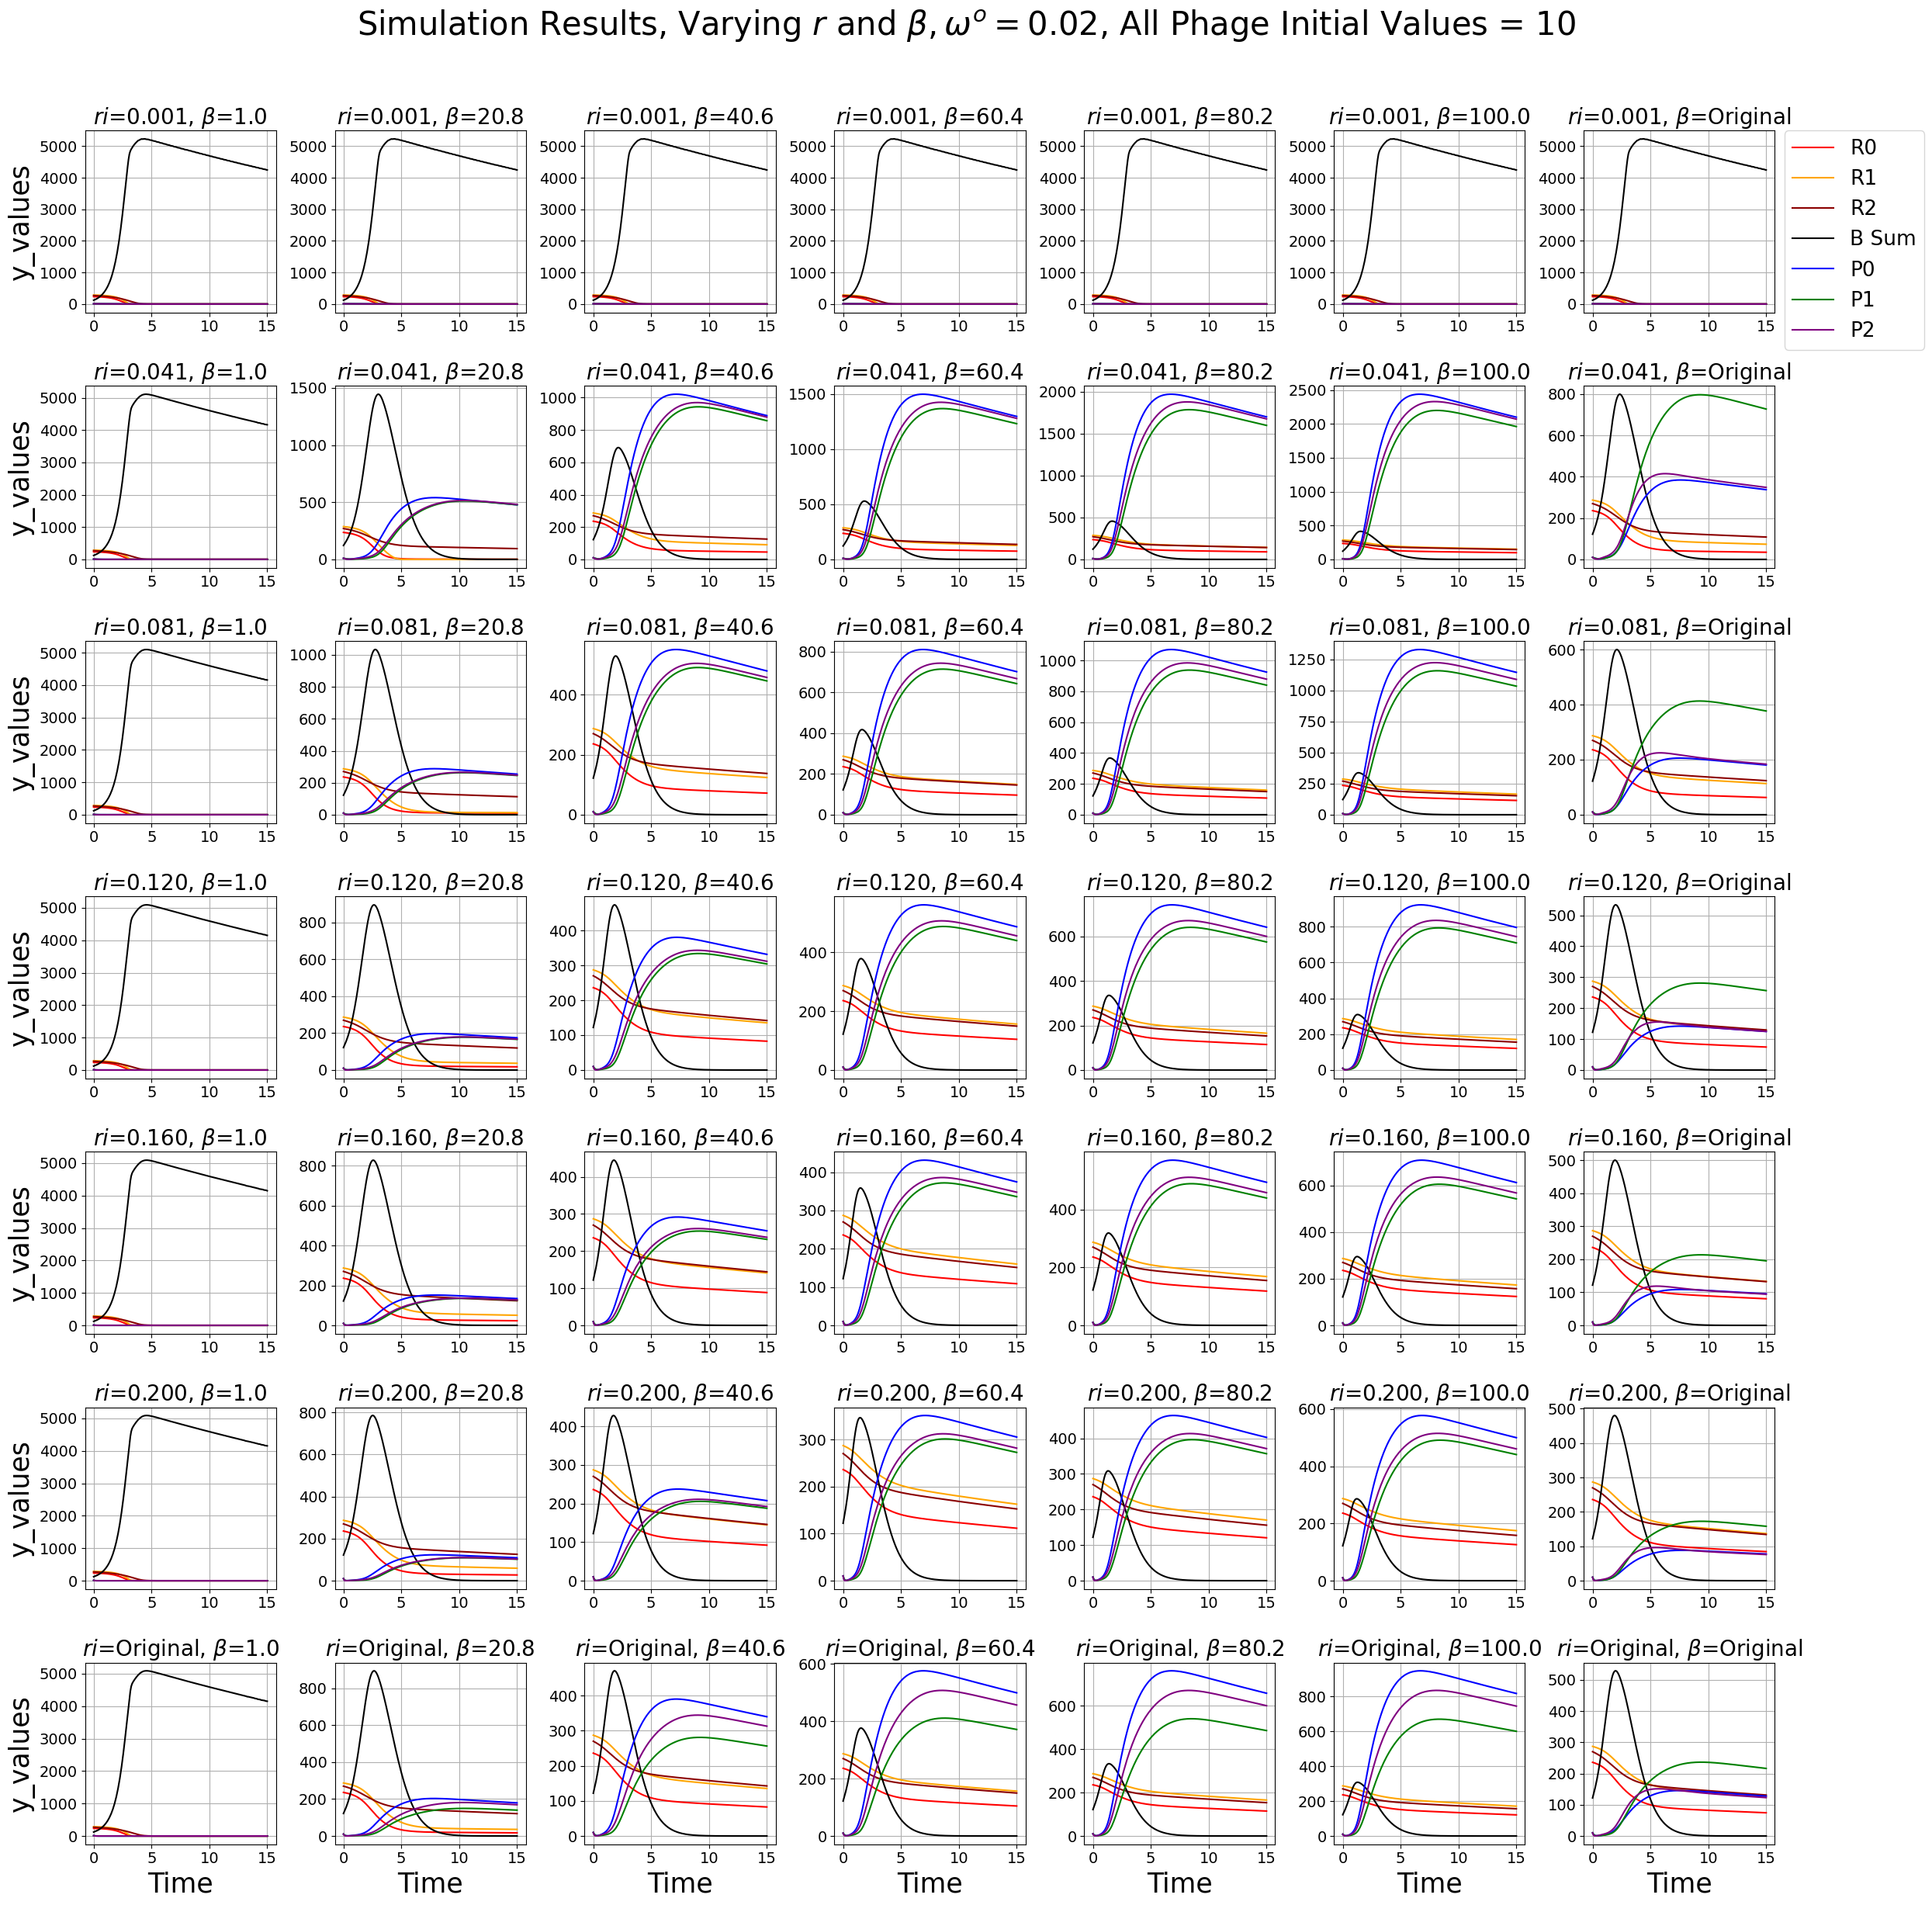

In [14]:
fixed_washout = 0.02
create_r_beta(fixed_washout)

[[0.001, 0.0408, 0.0806, 0.12040000000000001, 0.1602, 0.2, inf], [1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100.0, inf], [0.0, 0.02, 0.05]]


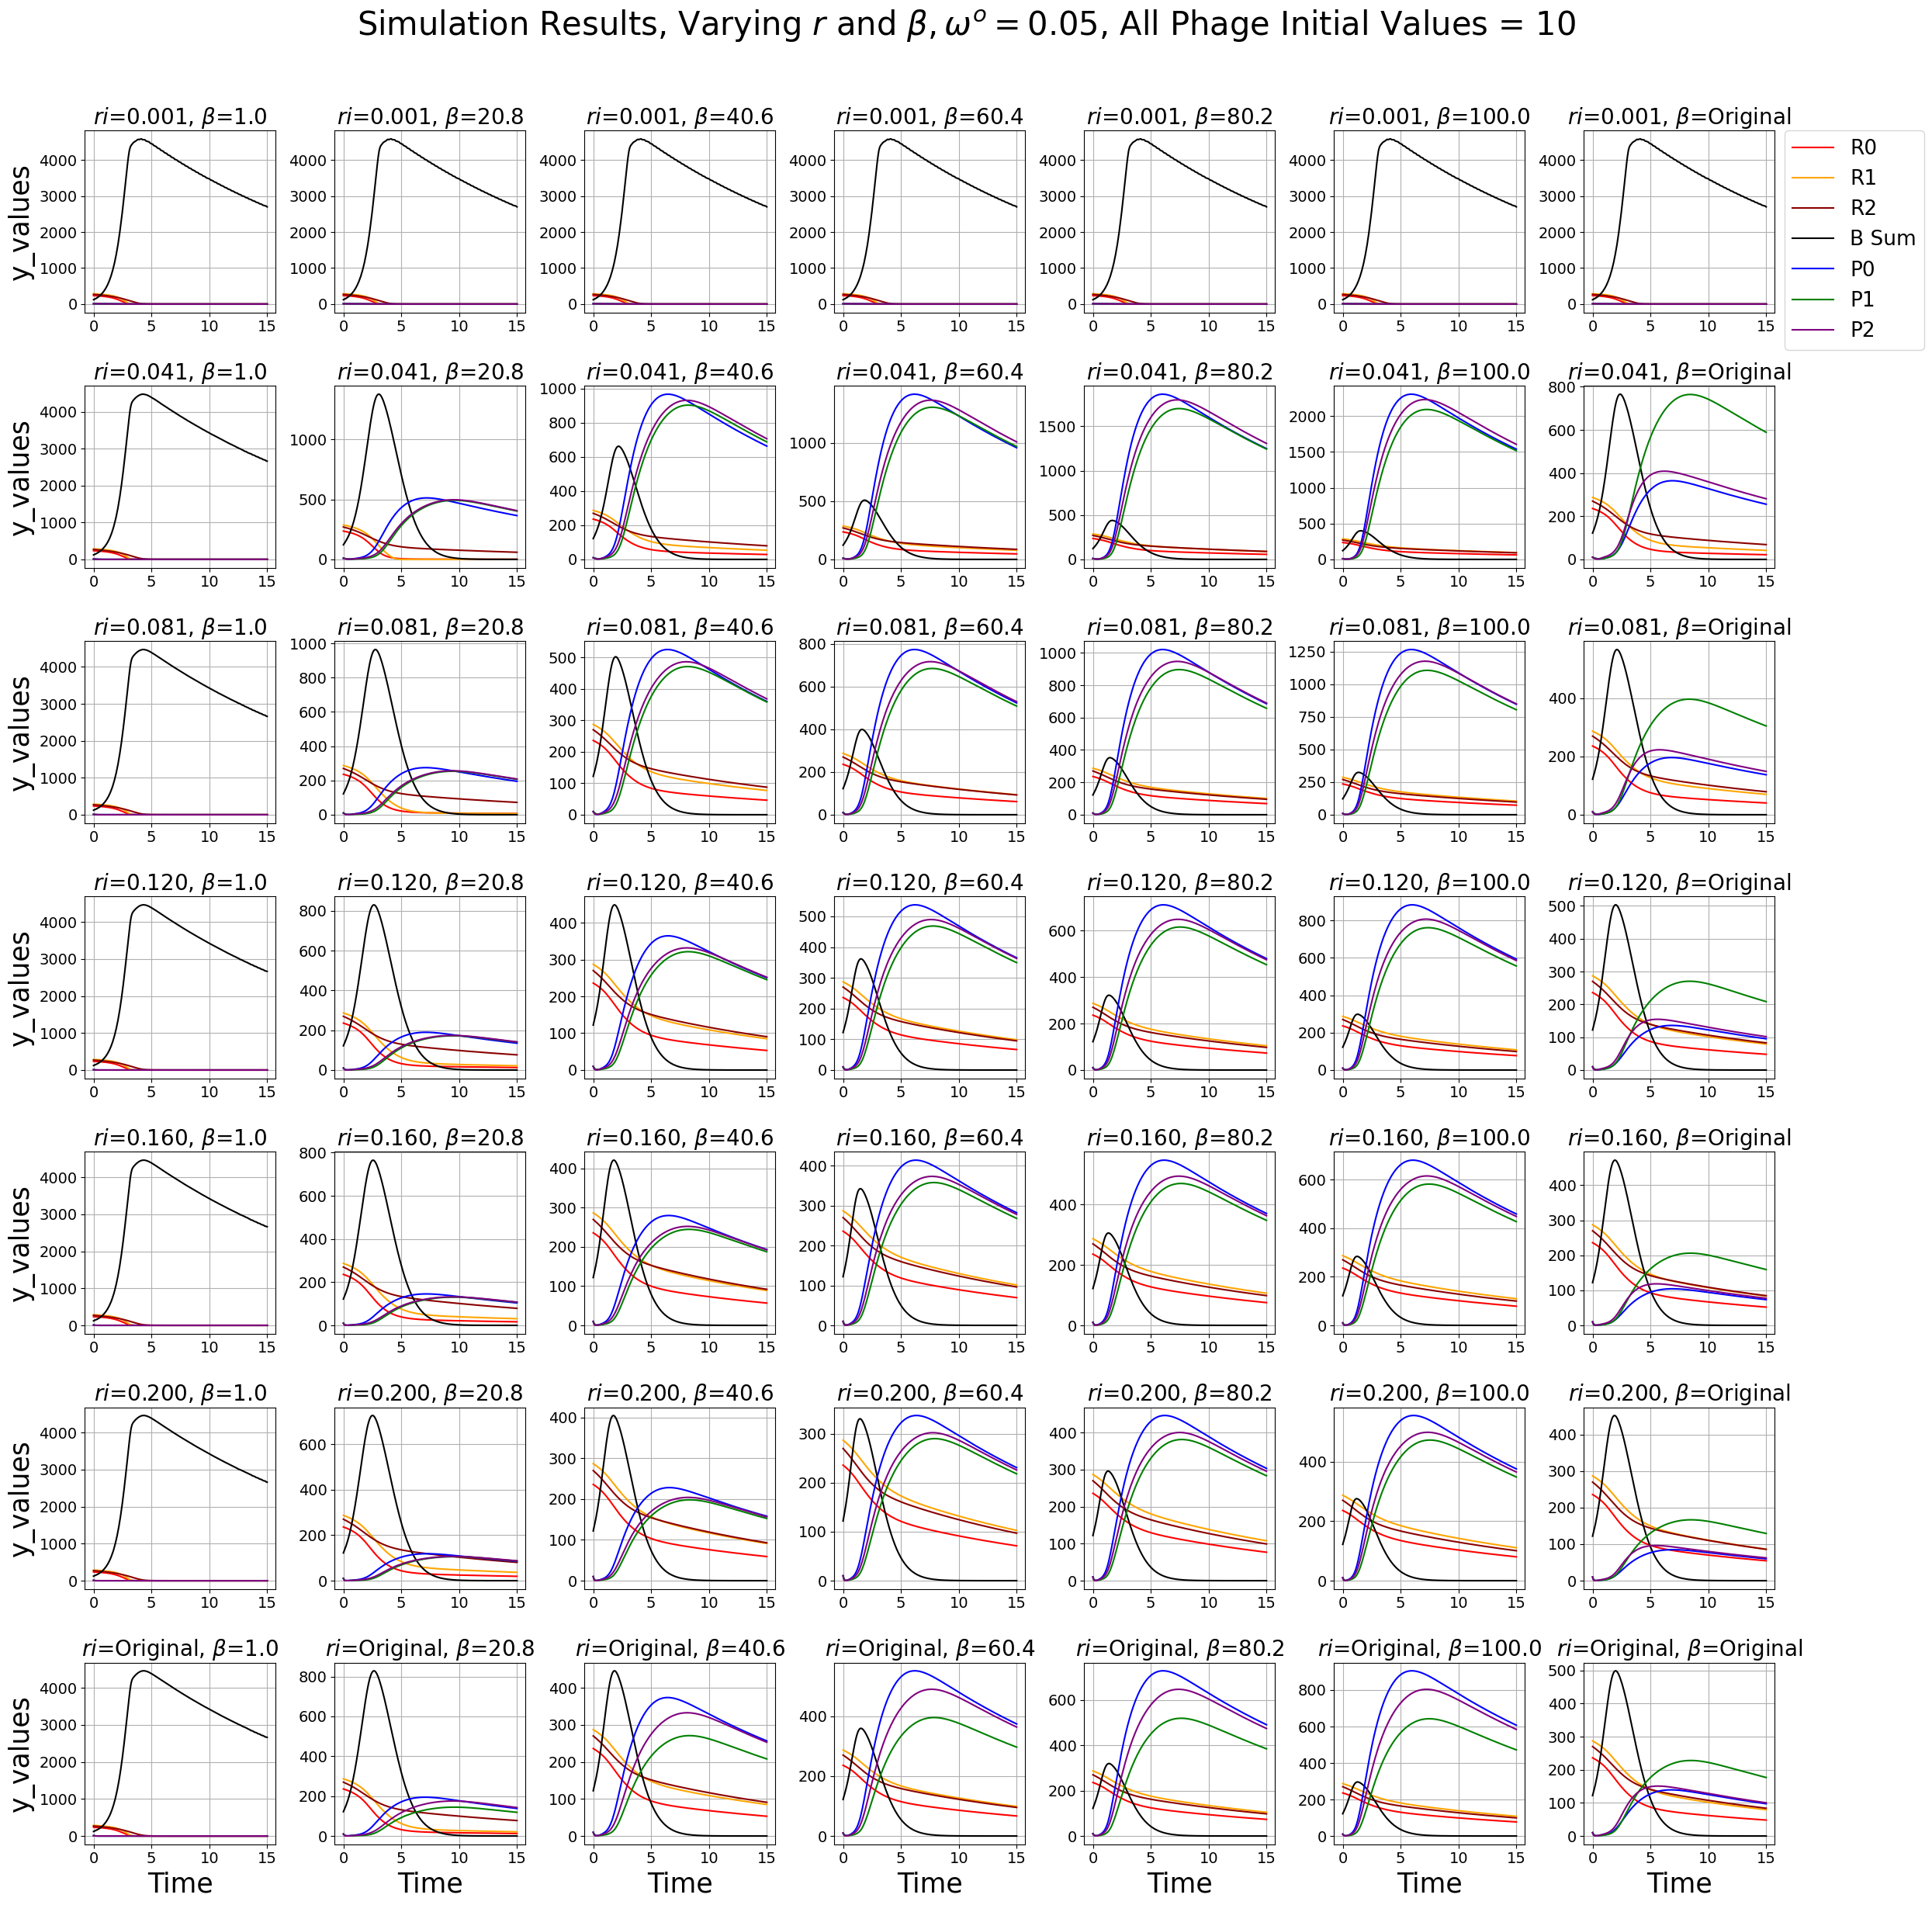

In [15]:
fixed_washout = 0.05
create_r_beta(fixed_washout)

In [21]:
def custom_query(r_value, beta_value, washout_value):
    query2 = ddf.query(f'washout == {washout_value} and r_matrix == {r_value} and B_matrix == {beta_value}').compute()
    t_values = np.array(ast.literal_eval(query2['t_values'].iloc[0]))
    y_values = np.array(ast.literal_eval(query2['y_values'].iloc[0]))
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_values[0], label='R0', color="red")
    plt.plot(t_values, y_values[1], label='R1', color="orange")
    plt.plot(t_values, y_values[2], label='R2', color="darkred")
    bac_sum = np.sum(y_values[3:13], axis=0)
    plt.plot(t_values, bac_sum, label='B Sum', color="black")
    plt.plot(t_values, y_values[-3], label='P0', color="blue")
    plt.plot(t_values, y_values[-2], label='P1', color="green")
    plt.plot(t_values, y_values[-1], label='P2', color="purple")
    if r_value == "inf":
        r_value = "Original"
    else:
        r_value = f"{r_value:.3f}"
    if beta_value == "inf":
        beta_value = "Original"
    else:
        beta_value = f"{beta_value:.1f}"
    plt.title(
        rf'Simulation Results for $r$={r_value}, $\beta$={beta_value}, $\omega^o$={washout_value}',
        fontsize=24
    )
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('y_values', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tight_layout()
    plt.savefig(f'LatexReport/Images/Plots/Created/UA/r_beta_washout_{r_value}_{beta_value}_{washout_value}.png', bbox_inches='tight')

    list_max = [y_values[-3], y_values[-2], y_values[-1]]
    for name, array in zip(['P0', 'P1', 'P2'], list_max):
        max_bac = np.max(array)
        threshold = 0.95 * max_bac
        idx_95 = np.where(array >= threshold)[0][0]
        time_95 = t_values[idx_95]
        print(f"Time when {name} reaches 95% of its max value: {time_95}")

Time when P0 reaches 95% of its max value: 6.331658291457286
Time when P1 reaches 95% of its max value: 7.989949748743718
Time when P2 reaches 95% of its max value: 4.522613065326633


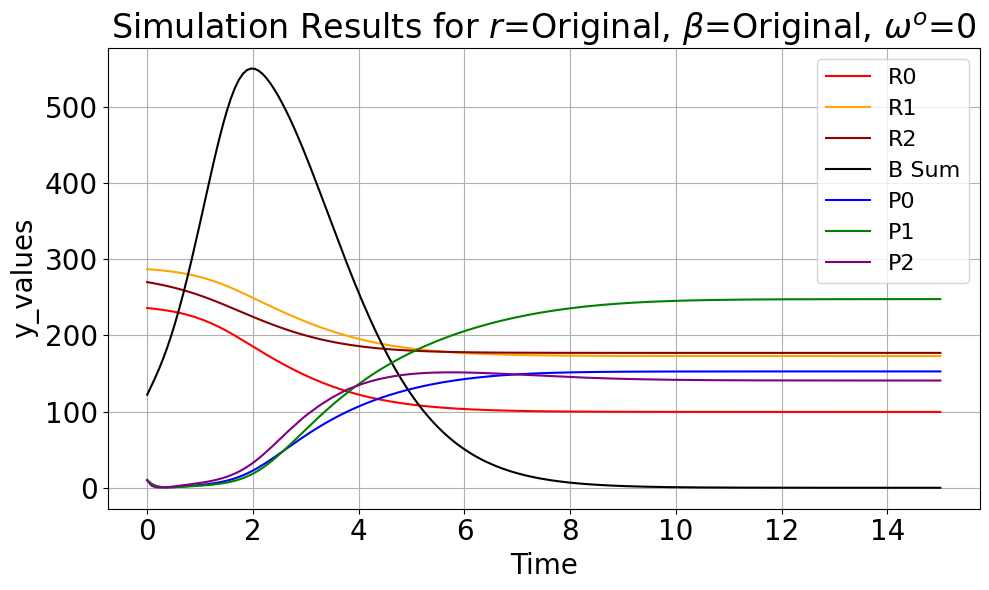

In [22]:
custom_query('inf', 'inf', 0)

Time when P0 reaches 95% of its max value: 5.50251256281407
Time when P1 reaches 95% of its max value: 7.010050251256281
Time when P2 reaches 95% of its max value: 6.783919597989949


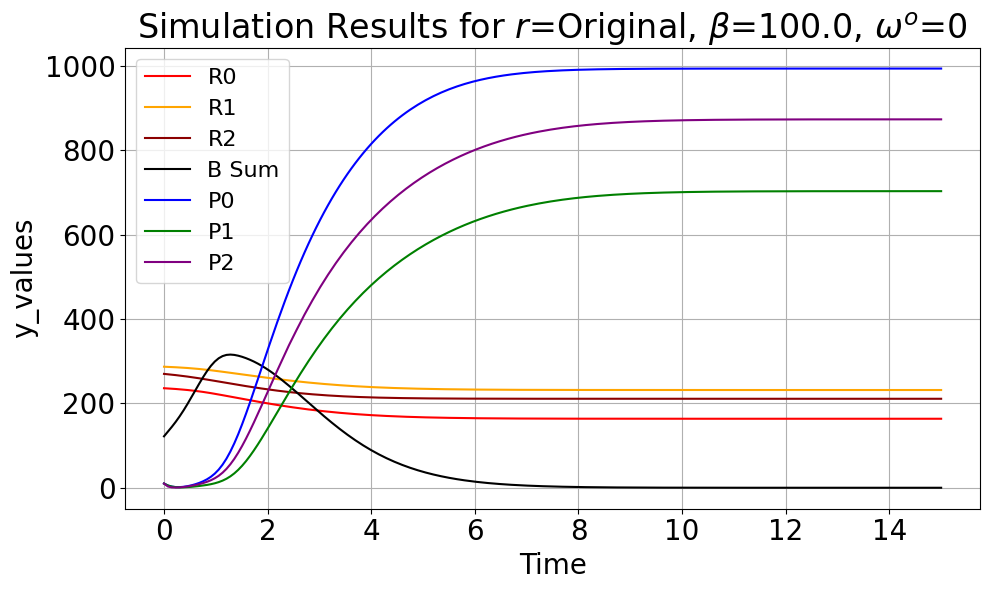

In [23]:
custom_query("inf", 100, 0)

Time when P0 reaches 95% of its max value: 5.7286432160804015
Time when P1 reaches 95% of its max value: 7.236180904522612
Time when P2 reaches 95% of its max value: 4.522613065326633


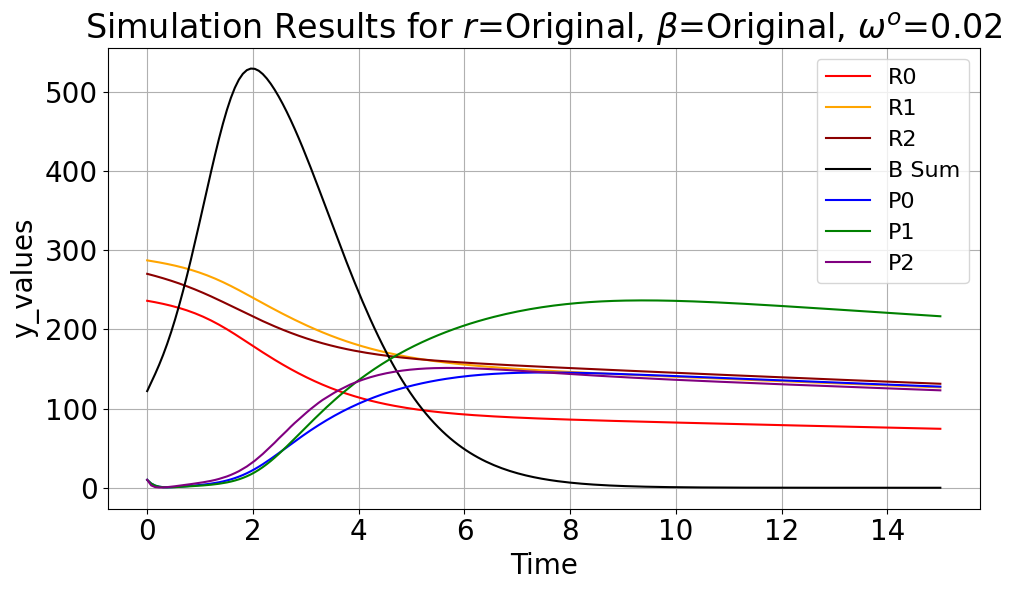

In [24]:
custom_query("inf", "inf", 0.02)